In [1]:
import numpy as np
import matplotlib.pyplot as plt
import UPAFuzzySystems as UPAfs

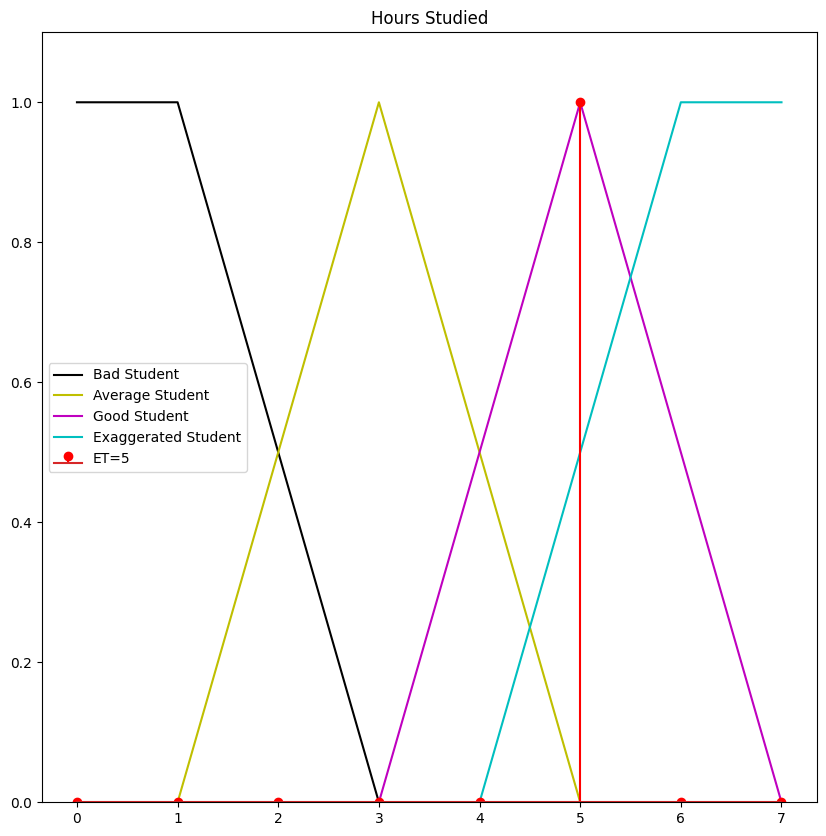

In [2]:
HoursStudied = UPAfs.fuzzy_universe('Hours Studied',np.arange(0,7+1,1),'continuous')
HoursStudied.add_fuzzyset('Bad Student','trapmf',[0,0,1,3])
HoursStudied.add_fuzzyset('Average Student','trimf',[1,3,5])
HoursStudied.add_fuzzyset('Good Student', 'trimf',[3,5,7])
HoursStudied.add_fuzzyset('Exaggerated Student','trapmf',[4,6,7,7])
HoursStudied.add_fuzzyset('ET','eq','5')

HoursStudied.view_fuzzy()

In [3]:
AverageStudent = HoursStudied.extract_fuzzyset('Average Student')


In [4]:
AverageStudent

{'universe': array([0, 1, 2, 3, 4, 5, 6, 7]),
 'membership values': array([0. , 0. , 0.5, 1. , 0.5, 0. , 0. , 0. ])}

In [5]:
BadStudent = HoursStudied.extract_fuzzyset('Bad Student')


In [6]:
BadStudent

{'universe': array([0, 1, 2, 3, 4, 5, 6, 7]),
 'membership values': array([1. , 1. , 0.5, 0. , 0. , 0. , 0. , 0. ])}

In [7]:
ExaggeratedStudent = HoursStudied.extract_fuzzyset('Exaggerated Student')


In [8]:
ExaggeratedStudent

{'universe': array([0, 1, 2, 3, 4, 5, 6, 7]),
 'membership values': array([0. , 0. , 0. , 0. , 0. , 0.5, 1. , 1. ])}

In [9]:
BadStudentAndAverageStudent = {'universe':BadStudent['universe'],
                              'membership values': np.minimum(BadStudent['membership values'],
                                                              AverageStudent['membership values'])}

In [10]:
BadStudentAndAverageStudent

{'universe': array([0, 1, 2, 3, 4, 5, 6, 7]),
 'membership values': array([0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. ])}

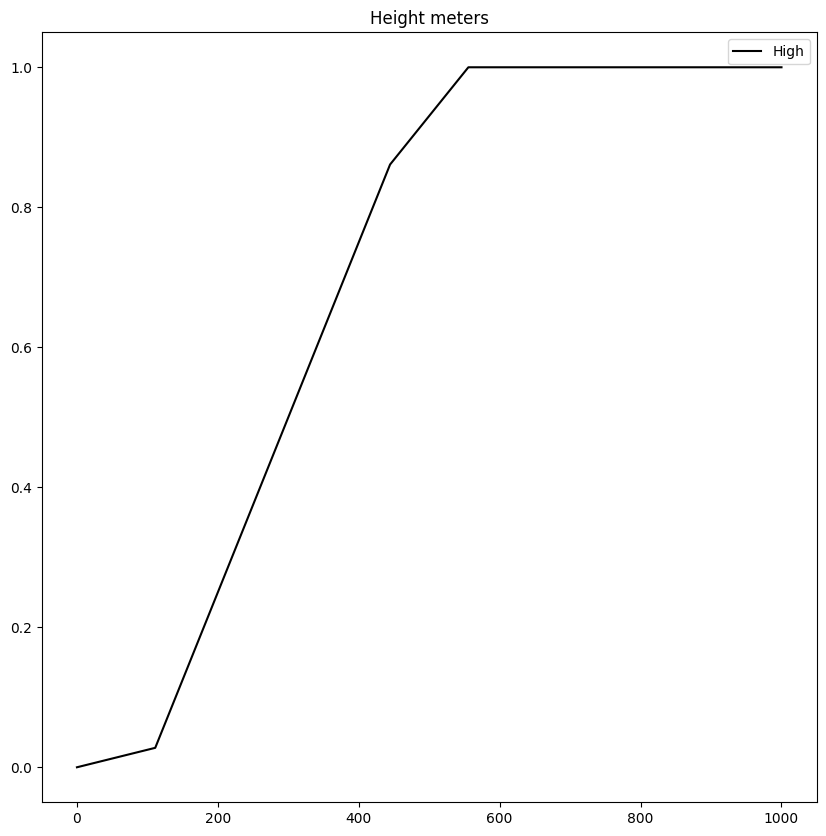

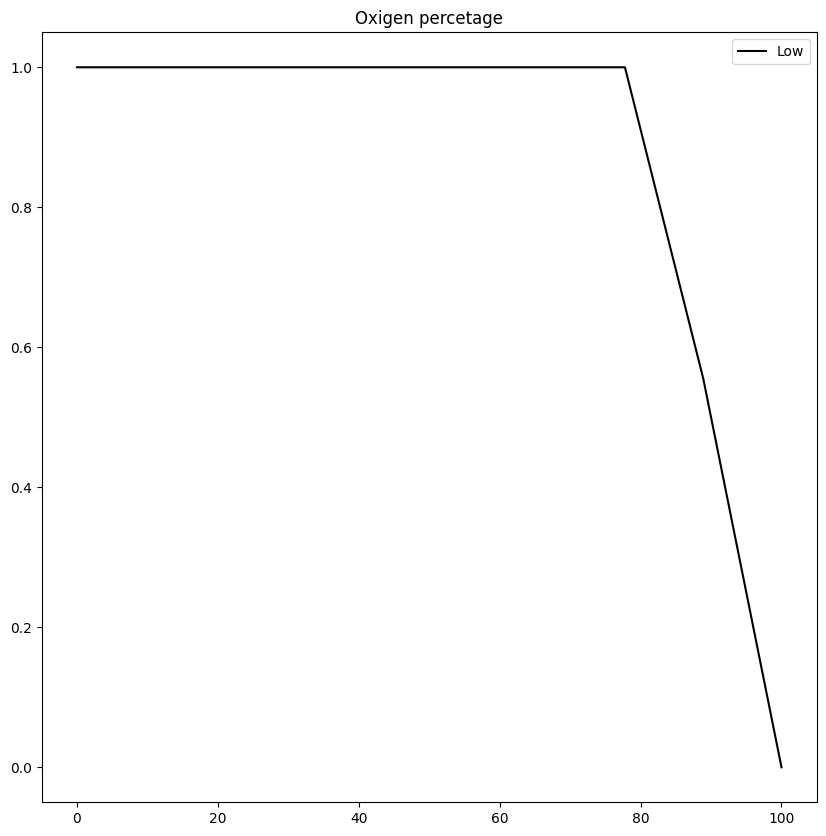

{'universe': array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
        44.44444444,  55.55555556,  66.66666667,  77.77777778,
        88.88888889, 100.        ]), 'membership values': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.55555556, 0.        ])}
{'universe': array([   0.        ,  111.11111111,  222.22222222,  333.33333333,
        444.44444444,  555.55555556,  666.66666667,  777.77777778,
        888.88888889, 1000.        ]), 'membership values': array([0.        , 0.02777778, 0.30555556, 0.58333333, 0.86111111,
       1.        , 1.        , 1.        , 1.        , 1.        ])}


In [11]:
%matplotlib inline
Height = UPAfs.fuzzy_universe('Height meters',np.linspace(0,1000,10),'continuous')
Height.add_fuzzyset('High','trapmf',[100,500,1000,1000])
Height.view_fuzzy()
Oxigen = UPAfs.fuzzy_universe('Oxigen percetage',np.linspace(0,100,10),'continuous')
Oxigen.add_fuzzyset('Low','trapmf',[0,0,80,100])
Oxigen.view_fuzzy()

OxigenLow = Oxigen.extract_fuzzyset('Low')
HeightHigh = Height.extract_fuzzyset('High')

print(OxigenLow)
print(HeightHigh)

In [12]:
size_x = OxigenLow['membership values'].shape[0]
size_y = HeightHigh['membership values'].shape[0]
OxLowAndHeiHigh_mv = np.zeros((size_x,size_y))
for x in range(size_x):
    for y in range(size_y):
        OxLowAndHeiHigh_mv[x,y]=np.minimum(OxigenLow['membership values'][x],
                                            HeightHigh['membership values'][y])

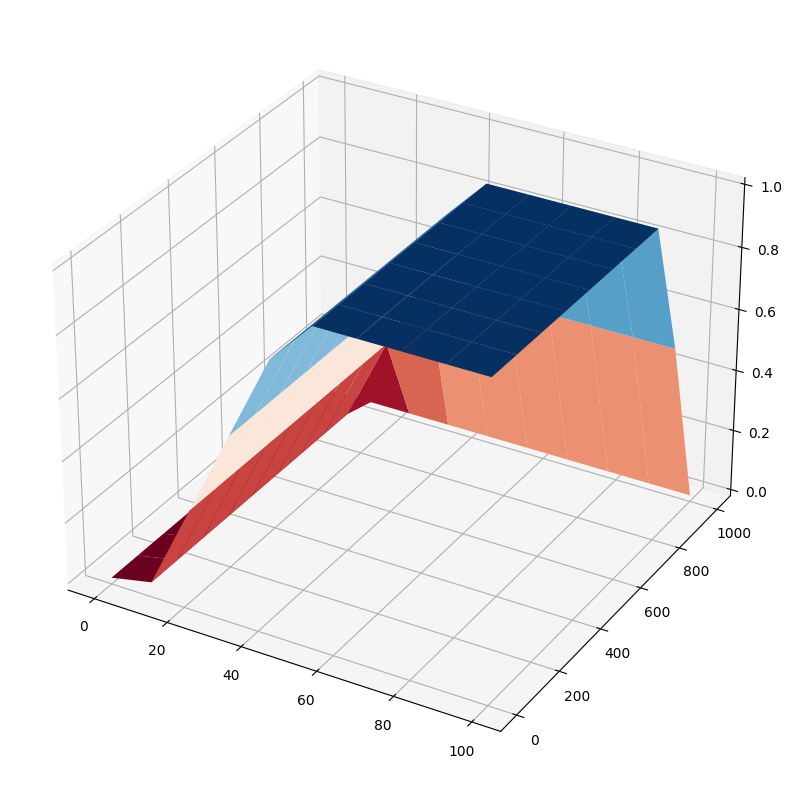

In [13]:
X,Y, = np.meshgrid(OxigenLow['universe'],HeightHigh['universe'])
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(1,1,1,projection = '3d')
ax1.plot_surface(X,Y,OxLowAndHeiHigh_mv,cmap='RdBu')


In [14]:
Speed = np.arange(0,210,10)
mbvFast = UPAfs.trapmf(Speed,[80,140,200,200])
mbvHigh = UPAfs.gbellmf(Speed,80,11,180)
Fast = {'universe':Speed, 'Membership Values':mbvFast}
High = {'universe':Speed, 'Membership Values':mbvHigh}
vHigh = {'universe':Speed, 'Membership Values':mbvHigh**2}

vHigh_and_Fast = {'universe':Speed, 'Membership Values':np.minimum(vHigh['Membership Values'],
Fast['Membership Values'])}


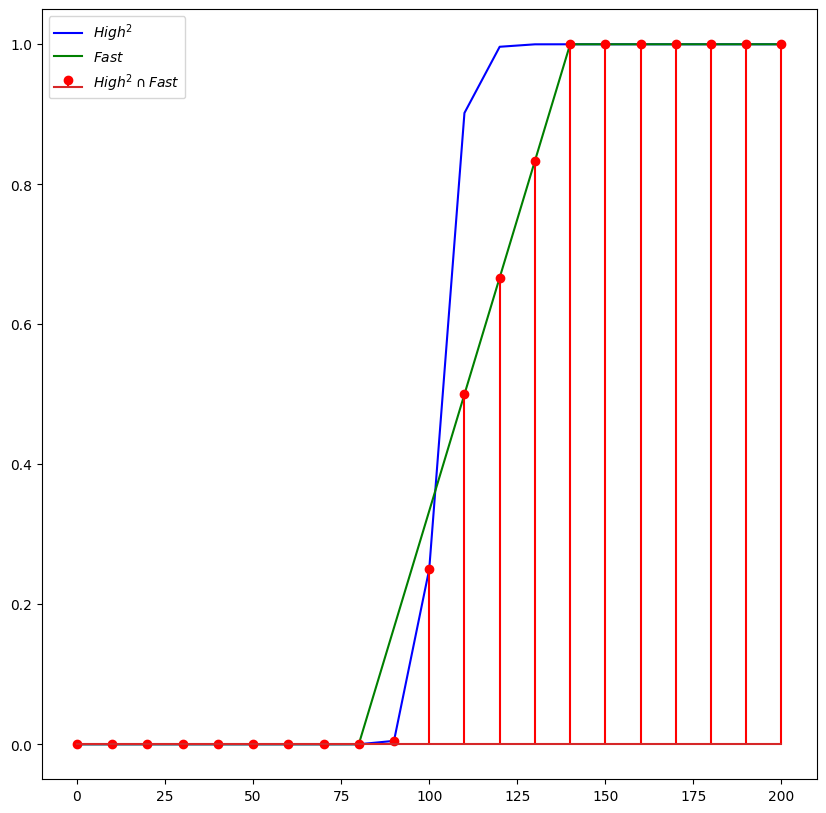

In [15]:
figure = plt.figure(figsize=(10,10))
ax = figure.add_subplot(111)
ax.plot(vHigh['universe'],vHigh['Membership Values'],'b',label = r'$High^2$')
ax.plot(Fast['universe'],Fast['Membership Values'],'g',label = r'$Fast$')
ax.stem(vHigh_and_Fast['universe'],vHigh_and_Fast['Membership Values'],'r',label = r'$High^2 \cap Fast$')

plt.legend()

In [16]:
X = np.linspace(0,5,6)
membX = np.array([0., 0.3, 0.5, 0.2, 1.0, 0.3])

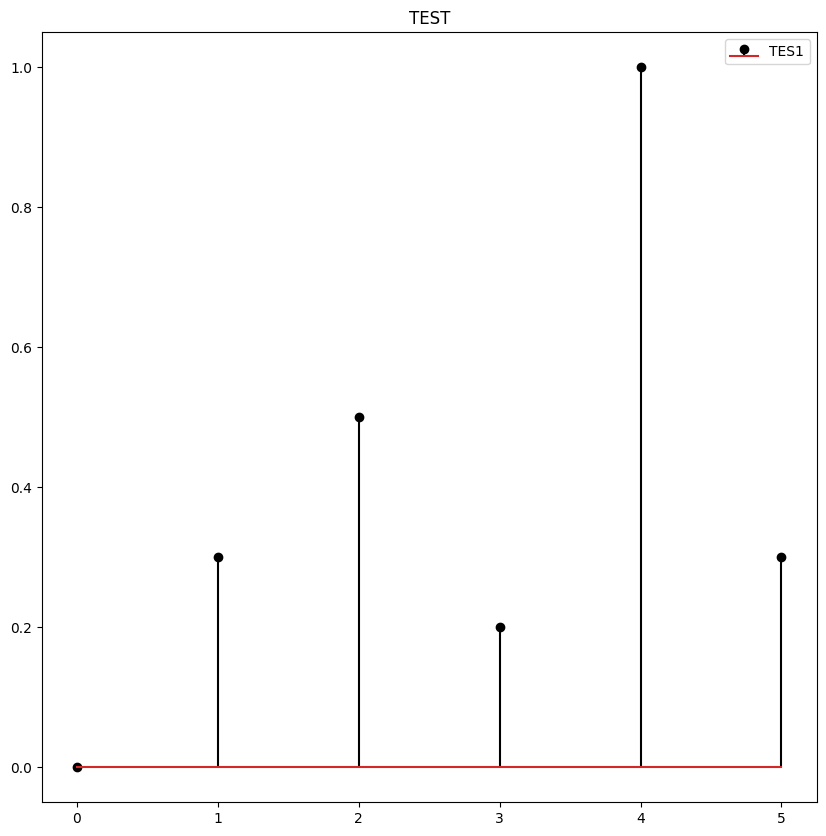

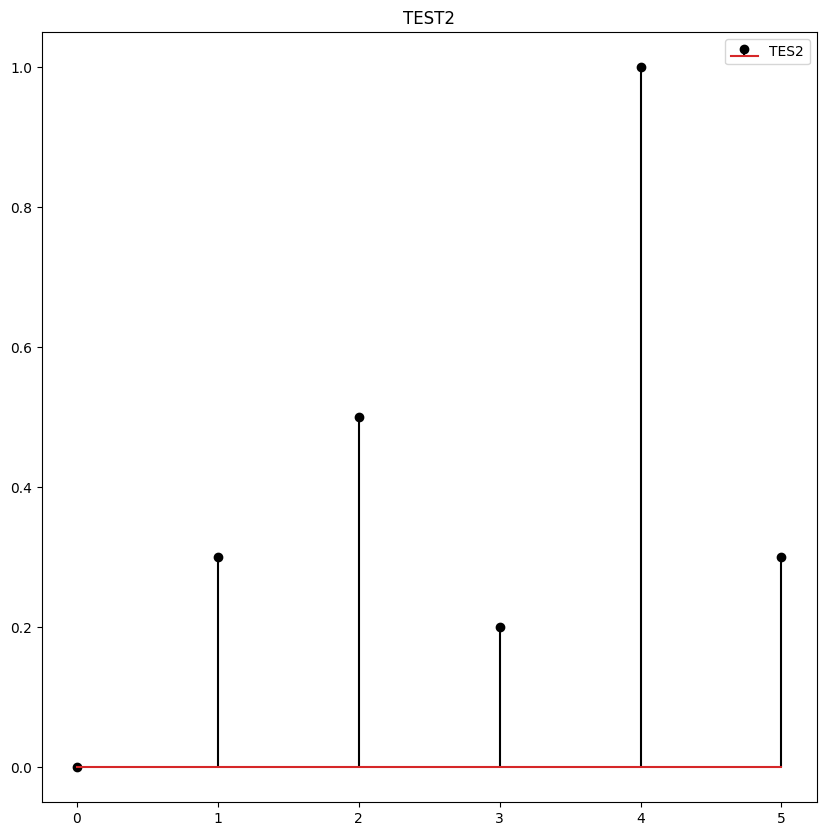

In [17]:
TESTU =UPAfs.fuzzy_universe('TEST',X,'discrete')
TESTU.add_fuzzyset('TES1','raw',membX)
TESTU.view_fuzzy()
TESTO =UPAfs.fuzzy_universe('TEST2',X,'discrete')
TESTO.add_fuzzyset('TES2','raw',membX)
TESTO.view_fuzzy()


In [18]:
TESTSIS = UPAfs.inference_system('TESTSIS')
TESTSIS.add_premise(TESTU)
TESTSIS.add_consequence(TESTO)
TESTSIS.add_rule([['TEST','TES1']],[],[['TEST2','TES2']])
TESTSIS.configure('Mamdani')  #for Linear the output must be Takagi Sugeno in this case is Mamdani because both are raw indicated
TESTSIS.build()

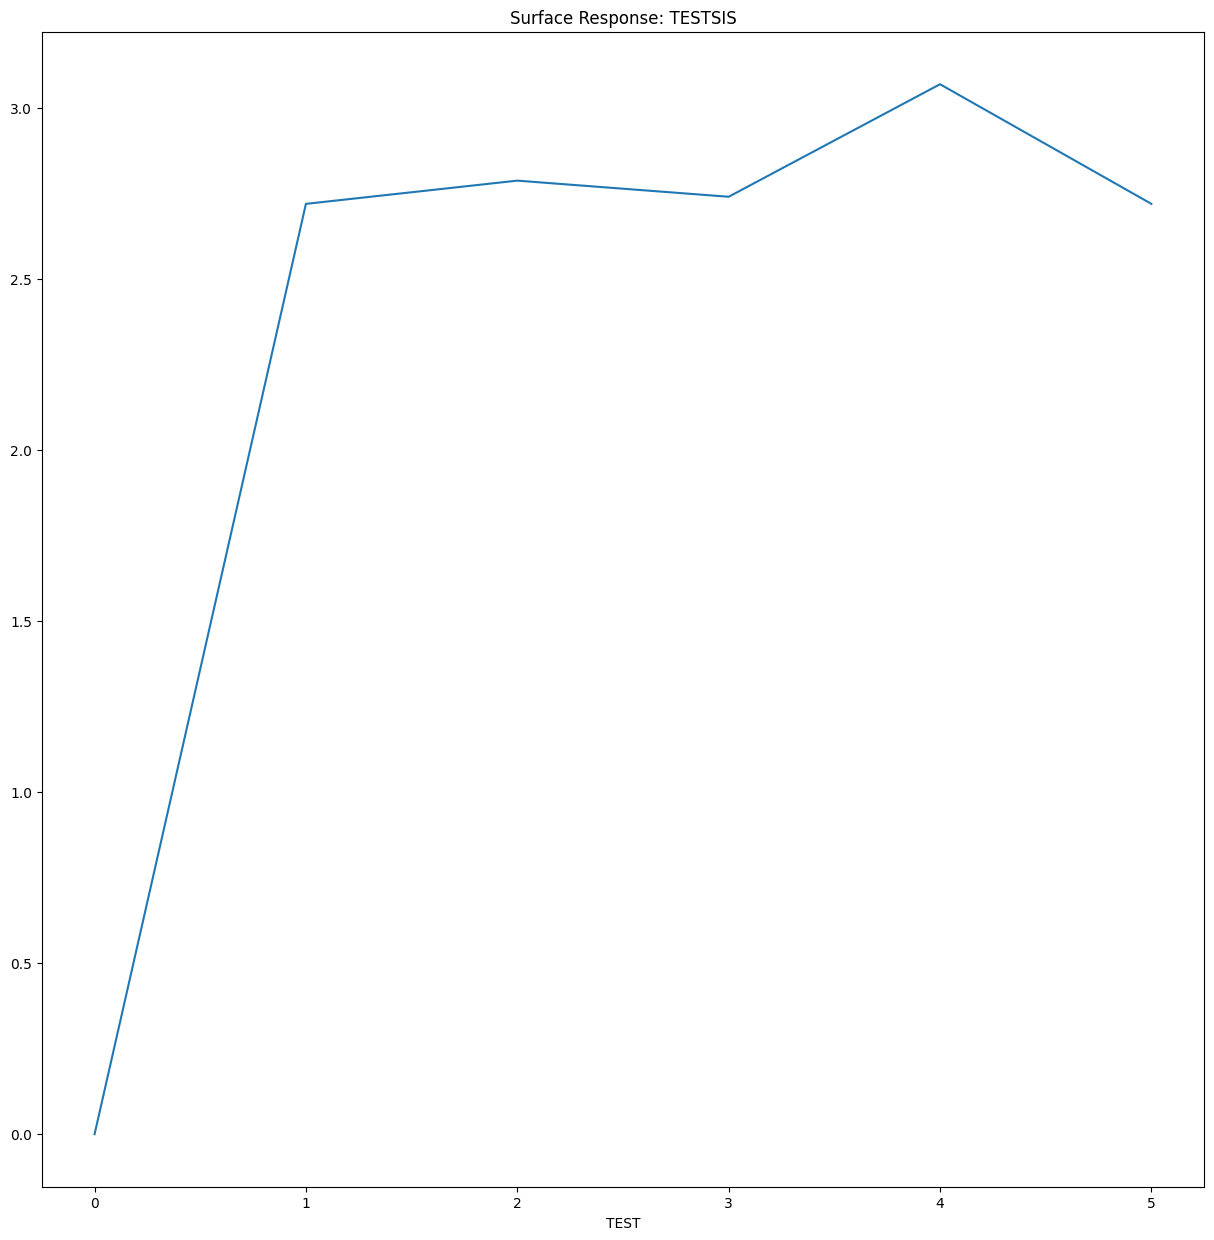

In [19]:
TESTSIS.surface_fuzzy_system([X])